# Data analysis: Pandas and Seaborn


[![Pandas banner](http://pandas.pydata.org/_static/pandas_logo.png)](http://pandas.pydata.org/)

_Pandas_ is a very strong library for manipulating large and complex datasets using a new data structure, the **data frame**, which models a table of data.
Pandas helps to close the gap between Python and R for data analysis and statistical computing.

Pandas data frames address three deficiencies of NumPy arrays:

- data frame hold heterogenous data; each column can have its own numpy.dtype,
- the axes of a data frame are labeled with column names and row indices,
- and, they account for missing values which this is not directly supported by arrays.

Data frames are extremely useful for data manipulation.
They provide a large range of operations such as filter, join, and group-by aggregation, as well as plotting.

In [1]:
import pandas as pd
print('Pandas version:', pd.__version__)

Pandas version: 0.25.3


# Statistical Analysis of Life History Traits

We will analyze animal life-history data from [AnAge](http://genomics.senescence.info/download.html#anage). 
We will get the data from the download page, but it's compressed with zip so we need to unzip it and then we can read the data using _pandas_ `read_table` function:

In [2]:
import urllib.request
import zipfile
import os.path

In [11]:
url = 'http://genomics.senescence.info/species/dataset.zip'
fname = '/home/colinphillips17/Desktop/TAVtech/dataset/anage_data.zip'
if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
print("Data file exists:", os.path.exists(fname))

Data file exists: True


In [78]:
data = pd.read_csv('/home/colinphillips17/Desktop/TAVtech/dataset/anage_data.txt', sep="\t")
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(4219, 31)


Pandas holds data in `DataFrame` (similar to _R_).
`DataFrame` have a single row per observation (in contrast to the previous exercise in which each table cell was one observation), and each column has a single variable. Variables can be numbers or strings.

The `head` method gives us the 5 first rows of the data frame.

In [79]:
data.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"


`DataFrame` has many of the features of `numpy.ndarray` - it also has a `shape` and various statistical methods (`max`, `mean` etc.).
However, `DataFrame` allows richer indexing.
For example, let's browse our data for species that have body mass greater than 300 kg.
First we will a create new column (`Series` object) that tells us if a row is a large animal row or not:

In [80]:
large_index = data['Body mass (g)'] > (300 * 1000) # 300 kg
large_index.head()

0    False
1    False
2    False
3    False
4    False
Name: Body mass (g), dtype: bool

Now, we slice our data with this boolean index. 
The `iterrows` method let's us iterate over the rows of the data.
For each row we get both the row as a `Series` object (similar to `dict` for our use) and the row number as an `int` (this is similar to the use of `enumerate` on lists and strings).

In [82]:
large_data = data[large_index]
for i, row in large_data.iterrows(): 
    print(row['Common name'], row['Body mass (g)']/1000, 'kg')


Domestic cattle 347.0 kg
Dromedary 407.0 kg
Moose 325.0 kg
Asiatic elephant 3672.0 kg
West Indian manatee 450.0 kg


<generator object DataFrame.iterrows at 0x7f1c1b786f10>

So... a [Dromedary](http://en.wikipedia.org/wiki/Dromedary) is the single-humped camel.

![Camel](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Camelus_dromedarius_on_Sinai.jpg/220px-Camelus_dromedarius_on_Sinai.jpg)

Let's continue with small and medium animals.
For starters, let's plot a scatter of body mass vs. metabolic rate.
Because we work with pandas, we can do that with the `plot` method of `DataFrame`, specifying the columns for `x` and `y` and a plotting style (without the style we would get a line plot which makes no sense here).

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

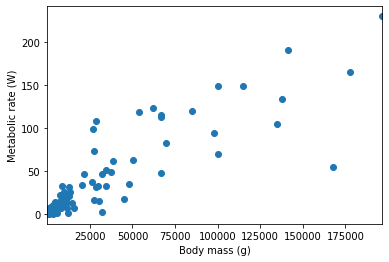

In [55]:
data = data[data['Body mass (g)'] < 3e5] 
data.plot(x='Body mass (g)', y='Metabolic rate (W)', style='o', legend=False)
plt.ylabel('Metabolic rate (W)');

If this plot looks funny, you are probably using Pandas with version <0.22; the bug was [reported] and fixed in version 0.22.

From this plot it seems that 
1. there is a correlation between body mass and metabolic rate, and 
1. there are many small animals (less than 30 kg) and not many medium animals (between 50 and 300 kg).

Before we continue, I prefer to have mass in kg, let's add a new column:

In [56]:
data['Body mass (kg)'] = data['Body mass (g)'] / 1000

Next, let's check how many records do we have for each Class (as in the taxonomic unit): 

In [57]:
class_counts = data['Class'].value_counts()
print(class_counts)

Mammalia    417
Aves        171
Amphibia     18
Reptilia     16
Name: Class, dtype: int64


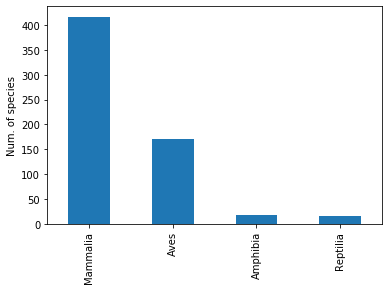

In [58]:
class_counts.plot(kind='bar')
plt.ylabel('Num. of species');

So we have lots of mammals and birds, and a few reptiles and amphibians. This is important as amphibian and reptiles could have a different replationship between mass and metabolism because they are cold blooded.

## Exercise

1) Check how many reptiles are in this dataset, and how many of them are of the genus `Python`.

In [59]:
reptiles = data['Class'].value_counts().loc["Reptilia"]
pythons = data["Genus"].value_counts().loc["Python"]

In [60]:
print("# of reptiles: ", reptiles)
print("# of pythons: ", pythons)

# of reptiles:  16
# of pythons:  2


2) Plot the number of species in each amphibian genus - use `value_counts` as above.

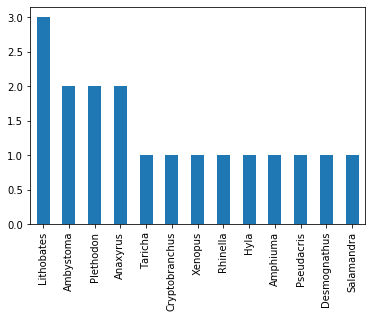

In [61]:
genus = data[data['Class'] == 'Amphibia']['Genus'].value_counts()
genus.plot(kind = "bar")

# Seaborn

Let's do a simple linear regression plot; but let's do it in separate for each Class. We can do this kind of thing with Matplotlib and [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), but a very good tool for statistical visualizations is **[Seaborn](http://seaborn.pydata.org)**.

Seaborn adds on top of Pandas a set of sophisticated statistical visualizations, similar to [ggplot2](http://ggplot2.org) for R.

In [62]:
import seaborn as sns
sns.set_context("talk")

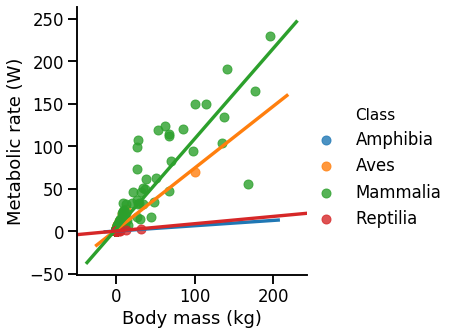

In [64]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Class', 
    data=data, 
    ci=True, 
);

- `hue` means _color_, but it also causes _seaborn_ to fit a different linear model to each of the Classes. 
- `ci` controls the confidence intervals. I chose `False`, but setting it to `True` will show them.

We can see that mammals and birds have a clear correlation between size and metabolism and that it extends over a nice range of mass, so let's stick to mammals; next up we will see which orders of mammals we have.

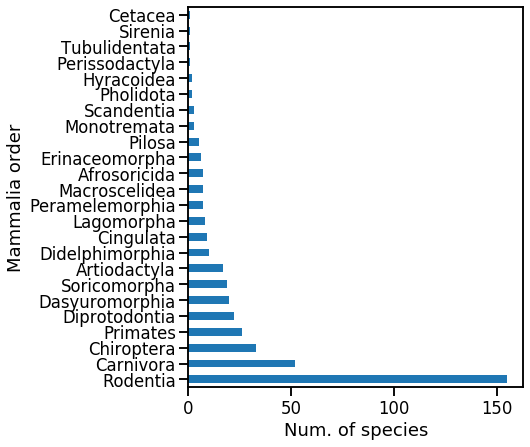

In [68]:
mammalia = data[data.Class=='Mammalia']
order_counts = mammalia.Order.value_counts()
ax = order_counts.plot.barh()
ax.set(
    xlabel='Num. of species',
    ylabel='Mammalia order'
)
ax.figure.set_figheight(7)

You see we have alot of rodents and carnivores, but also a good number of bats (_Chiroptera_) and primates.

Let's continue with orders that have at least 20 species - this also includes some cool marsupials like Kangaroo, Koala and [Taz](http://upload.wikimedia.org/wikipedia/en/c/c4/Taz-Looney_Tunes.svg) (Diprotodontia and Dasyuromorphia)

In [69]:
orders = order_counts[order_counts >= 20]
print(orders)
abund_mammalia = mammalia[mammalia.Order.isin(orders.index)]

Rodentia          155
Carnivora          52
Chiroptera         33
Primates           26
Diprotodontia      22
Dasyuromorphia     20
Name: Order, dtype: int64


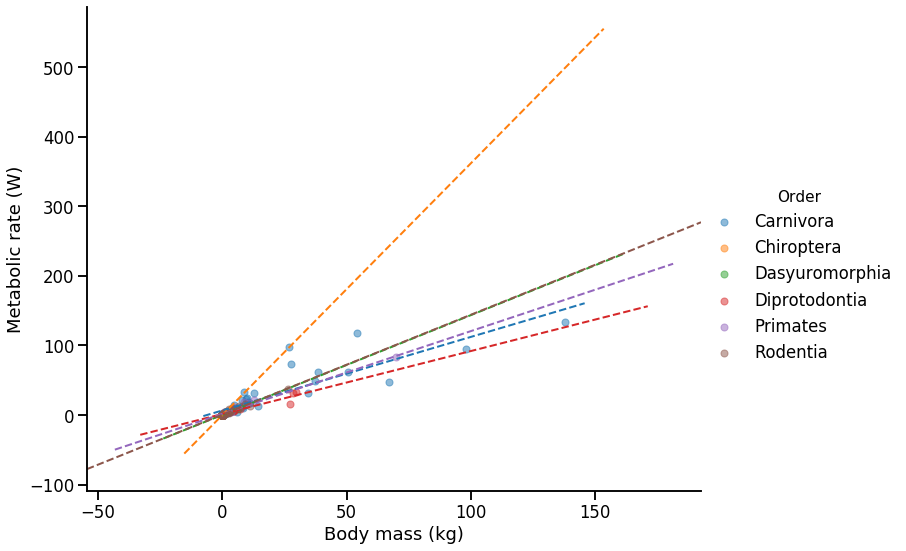

In [71]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Order',
    data=abund_mammalia, 
    ci=False, 
    height=8,
    aspect=1.3,
    line_kws={'lw':2, 'ls':'--'}, 
    scatter_kws={'s':50, 'alpha':0.5}
);

Because there is alot of data here I made the lines thinner - this can be done by giving _matplotlib_ keywords as a dictionary to the argument `line_kws` - and I made the markers bigger but with alpha (transperancy) 0.5 using the `scatter_kws` argument.

Still ,there's too much data, and part of the problem is that some orders are large (e.g. primates) and some are small (e.g. rodents).

Let's plot a separate regression plot for each order.
We do this using the `col` and `row` arguments of `lmplot`, but in general this can be done for any plot using [seaborn's `FacetGrid` function](http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html).

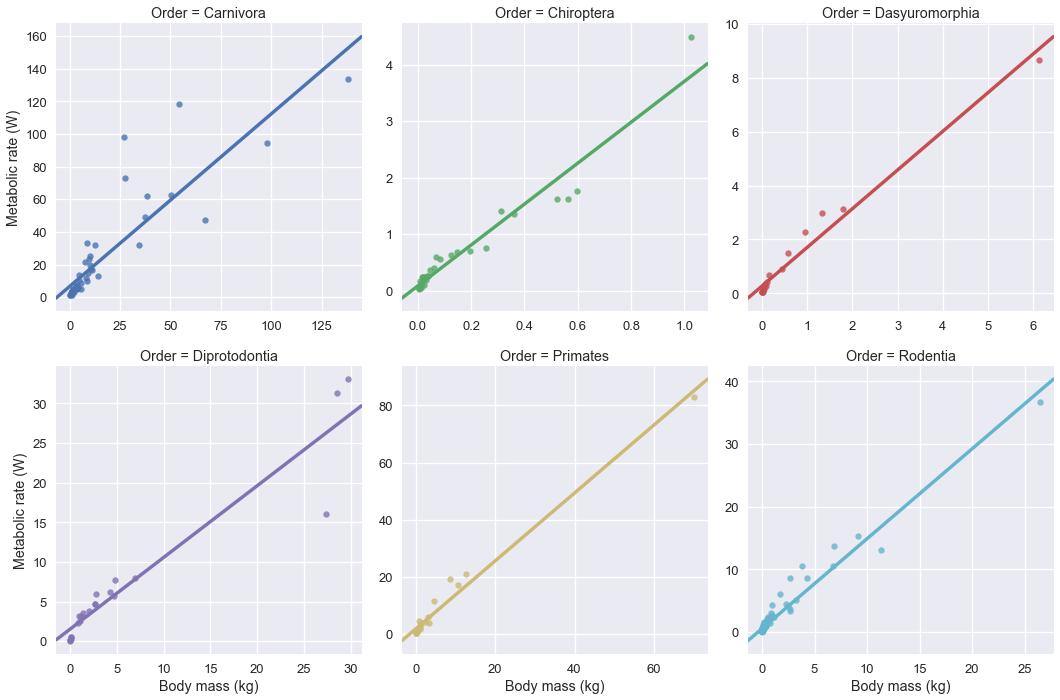

In [0]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    data=abund_mammalia, 
    hue='Order',
    col='Order', 
    col_wrap=3, 
    ci=None, 
    scatter_kws={'s':40}, 
    sharex=False, 
    sharey=False
);

We used the `sharex=False` and `sharey=False` arguments so that each Order will have a different axis range and so the data is will spread nicely.
Last but not least, let's have a closer look at the corelation between mass and metabolism in primates. 
We will do a joint plot which will give us the pearson correlation and the distribution of each parameter.

You can disregard the warning, it appears because seaborn uses a deprecated keyword argument of matplotlib.

Blue monkey | Brown lemur | Calabar angwantibo | Demidoff's galago | Fat-tailed dwarf lemur | Geoffroy's tamarin | Greater galago | Guereza | Hamadryas baboon | Human | Mantled howler monkey | Northern night monkey | Patas monkey | Philippine tarsier | Potto | Pygmy marmoset | Senegal galago | Slender loris | Slow loris | Small-eared galago | South African galago | South American squirrel monkey | Spectral tarsier | Verreaux's sifaka | Western needle-clawed galago | White-tufted-ear marmoset


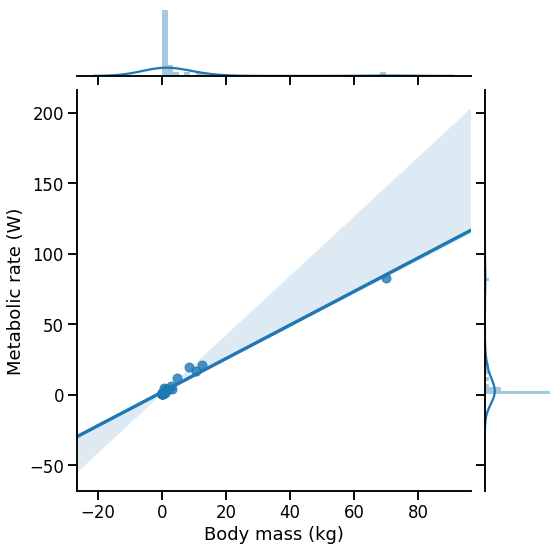

In [73]:
primates = mammalia[mammalia.Order == 'Primates']
print(' | '. join(sorted(primates["Common name"])))
sns.jointplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    data=primates, 
    kind='reg', 
    height=8
);

# References

- Examples: [Seaborn example gallery](http://seaborn.pydata.org/examples/index.html)
- Slides: [Statistical inference with Python](https://docs.google.com/presentation/d/1imQAEmNg4GB3bCAblauMOOLlAC95-XvkTSKB1_dB3Tg/pub?slide=id.p) by Allen Downey
- Book: [Think Stats](greenteapress.com/thinkstats2/html/index.html) by Allen Downey - statistics with Python. Free Ebook.
- Blog post: [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Tutorial: [An Introduction to Pandas](http://www.synesthesiam.com/posts/an-introduction-to-pandas.html)